# Preparatory Work

### 1)

### 2)

In [36]:
import numpy as np
import random

mu_1 = np.array([-3, 0])
mu_2 = np.array([3, 0])
sigma_1 = np.array([[5, -2], [-2, 1]])
sigma_2 = np.array([[5, 2], [2, 2]])

X = []
Y = []

for i in range(0,500):
    r = random.uniform(0, 1)
    if r < 0.3:
        x, y = np.random.multivariate_normal(mu_1, sigma_1)
    else:
        x, y = np.random.multivariate_normal(mu_2, sigma_2)
    X.append(x)
    Y.append(y)


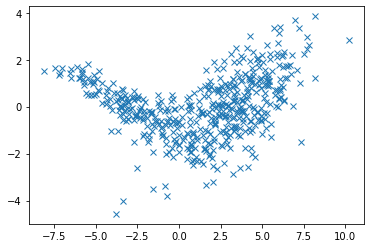

In [37]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'x')


### 3)

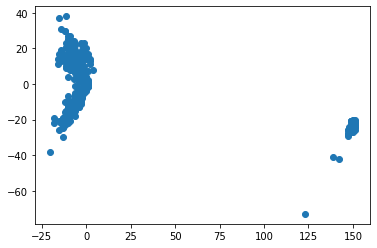

In [38]:
import pandas as pd

data = pd.read_csv('Unistroke/A01.txt', sep="\t", header=None).diff().iloc[1:]

for i in range(2,10):
    data = pd.concat([data, pd.read_csv('Unistroke/A0' + str(i) + '.txt', sep="\t", header=None).diff().iloc[1:]], ignore_index=True)
for i in range(10,51):
    data = pd.concat([data, pd.read_csv('Unistroke/A' + str(i) + '.txt', sep="\t", header=None).diff().iloc[1:]], ignore_index=True)

data.columns = ['x', 'y']
plt.scatter(data.x, data.y)

In [39]:
data2 = data.to_numpy()

In [40]:
data

,x,y
0,150.0,-21.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
958,-4.0,7.0
959,-2.0,3.0
960,1.0,-1.0
961,0.0,0.0


In [41]:
for i in range(len(data2)):
    x = data2[i][0]
    y = data2[i][1]
    if x != 0 or y != 0:
        mag = np.sqrt(x**2 + y**2)
        data2[i][0] = x / mag
        data2[i][1] = y / mag
        
data2 = data2[~np.all(data2 == 0, axis=1)]

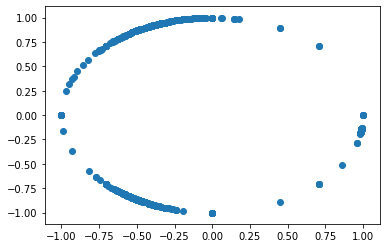

In [42]:
plt.scatter(data2[:,0], data2[:,1])

In [43]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2)

In [44]:
y = model.fit_predict(data2)

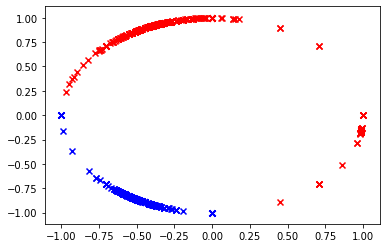

In [45]:
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []

for i in range(len(data2)):
    if y[i] == 0:
        x1.append(data2[i][0])
        y1.append(data2[i][1])
    elif y[i] == 1:
        x2.append(data2[i][0])
        y2.append(data2[i][1])
    else:
        x3.append(data2[i][0])
        y3.append(data2[i][1])
        
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='b', marker="x")
ax1.scatter(x2, y2, c='r', marker="x")
ax1.scatter(x3, y3, c='k', marker="x")


plt.show()

### 2)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Log scale: values of z <= 0 have been masked
  app.launch_new_instance()
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


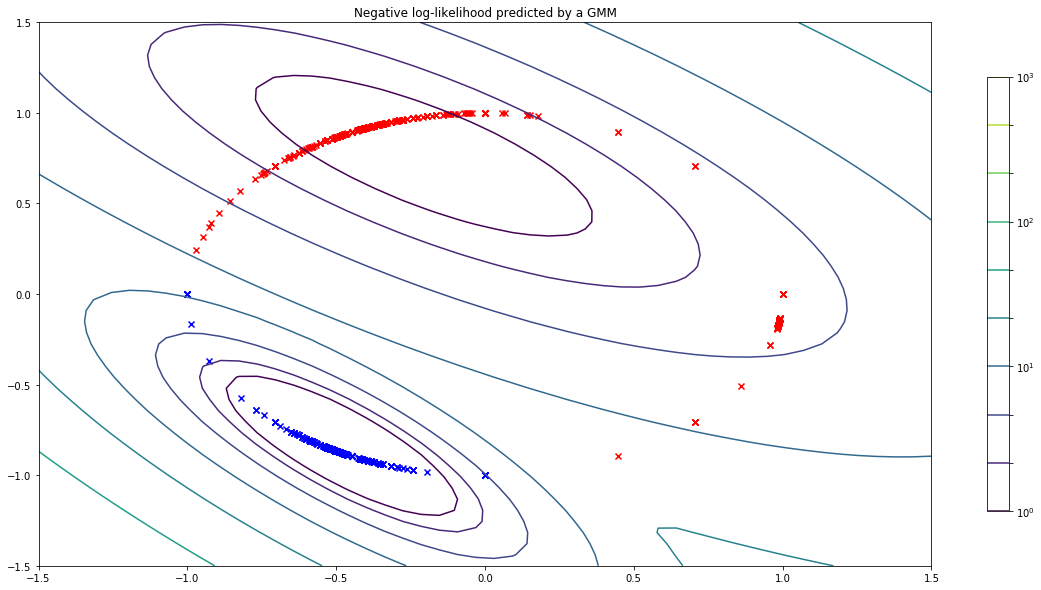

In [46]:
from matplotlib.colors import LogNorm
X_train = data2
clf = model

# display predicted scores by the model as a contour plot
x = np.linspace(-1.5, 1.5)
y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(figsize=(20, 10))

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
ax.scatter(x1, y1, c='b', marker="x")
ax.scatter(x2, y2, c='r', marker="x")
ax.scatter(x3, y3, c='k', marker="x")
plt.title('Negative log-likelihood predicted by a GMM')
ax.axis('tight')
fig.show()

### 3)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.14013453, 0.44843049, 2.44394619, 1.01457399, 0.16816143,
        0.42600897, 0.        , 0.01681614, 0.03363229, 0.30829596]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

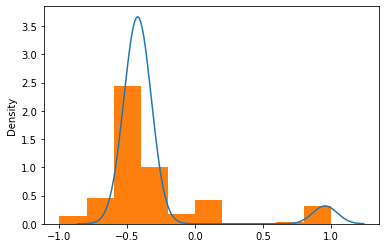

In [56]:
import seaborn as sns

all_x = []
all_y = []

for x_i , y_i in data2:
    all_x.append(x_i)
    all_y.append(y_i)

model_x = GaussianMixture(n_components=2)
model_x_pred = model_x.fit_predict(np.array(all_x).reshape(-1,1))

weights = model_x.weights_
mu = model_x.means_
sigma = model_x.covariances_

samples_x = []
for i in range(0, 1000):
    if random.uniform(0, 1) < weights[0]:
        z = 0
    else:
        z = 1
    samples_x.append(np.random.normal(mu[z], sigma[z], 1))

sns.distplot(samples_x, hist=False)

plt.hist(all_x, density=True)


/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([1.89461883, 0.2690583 , 0.01121076, 0.01681614, 0.2690583 ,
        0.11210762, 0.02242152, 0.01681614, 0.25784753, 2.13004484]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

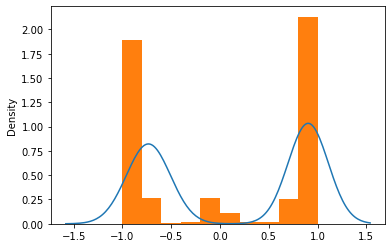

In [57]:
model_y = GaussianMixture(n_components=2)
model_y_pred = model_y.fit_predict(np.array(all_y).reshape(-1,1))

weights = model_y.weights_
mu = model_y.means_
sigma = model_y.covariances_

samples_y = []
for i in range(0, 1000):
    if random.uniform(0, 1) < weights[0]:
        z = 0
    else:
        z = 1
    samples_y.append(np.random.normal(mu[z], sigma[z], 1))

sns.distplot(samples_y, hist=False)

plt.hist(all_y, density=True)


/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.42606516, 0.02506266, 0.37593985, 0.52631579, 2.75689223,
        4.01002506, 1.02756892, 0.22556391, 0.02506266, 0.60150376]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 10 Patch objects>)

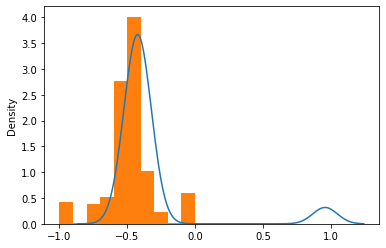

In [61]:
sns.distplot(samples_x, hist=False)
plt.hist(x1, density=True)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.08236552, 0.52508017, 1.79144999, 1.27666551, 0.67951551,
        0.06177414, 0.        , 0.03088707, 0.06177414, 0.56626293]),
 array([-0.9701425 , -0.77312825, -0.576114  , -0.37909975, -0.1820855 ,
         0.01492875,  0.211943  ,  0.40895725,  0.6059715 ,  0.80298575,
         1.        ]),
 <a list of 10 Patch objects>)

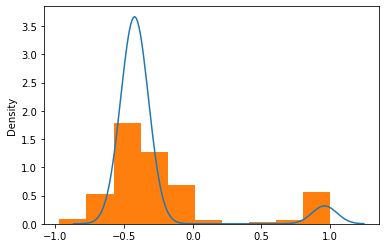

In [62]:
sns.distplot(samples_x, hist=False)
plt.hist(x2, density=True)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([2.40601504, 6.04010025, 1.02756892, 0.07518797, 0.02506266,
        0.        , 0.02506266, 0.        , 0.02506266, 0.37593985]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 10 Patch objects>)

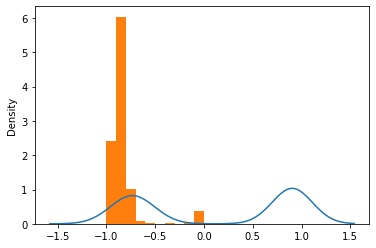

In [63]:
sns.distplot(samples_y, hist=False)
plt.hist(y1, density=True)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.05353591, 0.        , 0.01070718, 0.49253035, 0.08565745,
        0.        , 0.04282873, 0.03212154, 0.53535907, 4.02590022]),
 array([-0.89442719, -0.70498447, -0.51554175, -0.32609903, -0.13665631,
         0.0527864 ,  0.24222912,  0.43167184,  0.62111456,  0.81055728,
         1.        ]),
 <a list of 10 Patch objects>)

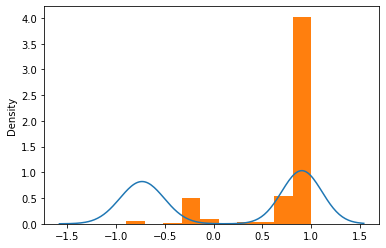

In [64]:
sns.distplot(samples_y, hist=False)
plt.hist(y2, density=True)